In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns

import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint

%matplotlib inline

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt.gz', compression='gzip', header=None, sep=' ', quotechar='"', error_bad_lines=False)

In [3]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df.shape

(900223, 6)

<AxesSubplot:>

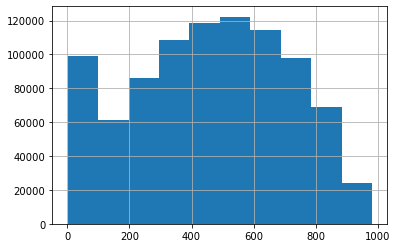

In [5]:
df[3.0].hist()

In [6]:
df.columns = ['date', 'access_time', 'page_visited', 'user_id', 'cohort_num', 'ip']

In [7]:
df.head()

,date,access_time,page_visited,user_id,cohort_num,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [8]:
df.groupby('user_id').ip.value_counts()

user_id  ip            
1        97.105.19.58      3099
         70.121.215.53     1061
         97.105.19.61      1016
         66.69.40.223       989
         70.121.199.82      442
                           ... 
979      107.77.217.112      13
         107.77.220.107      10
         107.77.222.49        3
980      97.105.19.60         3
981      67.11.98.144        42
Name: ip, Length: 7535, dtype: int64

In [9]:
df.groupby('user_id').date.value_counts()

user_id  date      
1        2019-07-08    101
         2019-03-01     73
         2018-05-29     68
         2019-02-11     66
         2019-07-09     64
                      ... 
980      2021-04-14      1
         2021-04-19      1
981      2021-04-19     25
         2021-04-20      9
         2021-04-21      8
Name: date, Length: 77428, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          900223 non-null  object 
 1   access_time   900223 non-null  object 
 2   page_visited  900222 non-null  object 
 3   user_id       900223 non-null  int64  
 4   cohort_num    847330 non-null  float64
 5   ip            900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [11]:
df['cohort_num'].unique().tolist()

[8.0,
 22.0,
 21.0,
 1.0,
 16.0,
 18.0,
 19.0,
 nan,
 13.0,
 14.0,
 15.0,
 7.0,
 4.0,
 12.0,
 17.0,
 23.0,
 2.0,
 9.0,
 11.0,
 24.0,
 25.0,
 26.0,
 6.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 34.0,
 51.0,
 52.0,
 53.0,
 55.0,
 56.0,
 57.0,
 5.0,
 58.0,
 59.0,
 61.0,
 62.0,
 132.0,
 134.0,
 133.0,
 135.0,
 138.0,
 137.0,
 139.0]

In [12]:
df_explore = df.groupby(['date','cohort_num']).ip.value_counts()

In [13]:
df.loc[df['ip'] == '173.173.109.5']

,date,access_time,page_visited,user_id,cohort_num,ip
755214,2020-12-08,10:49:37,/,835,133.0,173.173.109.5
755276,2020-12-08,10:58:37,fundamentals/intro-to-data-science,835,133.0,173.173.109.5
755277,2020-12-08,10:58:38,fundamentals/modern-data-scientist.jpg,835,133.0,173.173.109.5
755278,2020-12-08,10:58:38,fundamentals/AI-ML-DL-timeline.jpg,835,133.0,173.173.109.5
755314,2020-12-08,11:01:36,fundamentals/data-science-pipeline,835,133.0,173.173.109.5
...,...,...,...,...,...,...
899662,2021-04-21,10:42:22,python/intro-to-seaborn,835,133.0,173.173.109.5
899664,2021-04-21,10:42:28,fundamentals/visualization-with-excel,835,133.0,173.173.109.5
899672,2021-04-21,10:43:15,classification/overview,835,133.0,173.173.109.5
899673,2021-04-21,10:43:15,classification/classical_programming_vs_machin...,835,133.0,173.173.109.5


In [14]:
df.cohort_num.fillna(999 ,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          900223 non-null  object 
 1   access_time   900223 non-null  object 
 2   page_visited  900222 non-null  object 
 3   user_id       900223 non-null  int64  
 4   cohort_num    900223 non-null  float64
 5   ip            900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [16]:
df.cohort_num.isna().value_counts()

False    900223
Name: cohort_num, dtype: int64

In [17]:
df.loc[df['cohort_num'] == 999]

,date,access_time,page_visited,user_id,cohort_num,ip
411,2018-01-26,16:46:16,/,48,999.0,97.105.19.61
412,2018-01-26,16:46:24,spring/extra-features/form-validation,48,999.0,97.105.19.61
425,2018-01-26,17:54:24,/,48,999.0,97.105.19.61
435,2018-01-26,18:32:03,/,48,999.0,97.105.19.61
436,2018-01-26,18:32:17,mysql/relationships/joins,48,999.0,97.105.19.61
...,...,...,...,...,...,...
899897,2021-04-21,12:49:00,javascript-ii,717,999.0,136.50.102.126
899898,2021-04-21,12:49:02,javascript-ii/es6,717,999.0,136.50.102.126
899899,2021-04-21,12:51:27,javascript-ii/map-filter-reduce,717,999.0,136.50.102.126
899900,2021-04-21,12:52:37,javascript-ii/promises,717,999.0,136.50.102.126


In [18]:
pd.set_option('display.max_rows', None)

In [19]:
df.query('user_id==717')[['date','ip','page_visited']].value_counts().sort_values()

date        ip              page_visited                                                             
2020-09-15  136.50.57.27    jquery                                                                        1
2020-11-23  136.50.23.183   appendix/professional-development/professional-resume                         1
2020-12-02  136.50.23.183   spring/fundamentals/security/authentication                                   1
2020-12-03  136.50.23.183   javascript-ii                                                                 1
                            jquery                                                                        1
2020-12-04  136.50.23.183   spring/extra-features/form-validation                                         1
2020-12-07  136.50.23.183   spring/extra-features/json-response                                           1
                            spring/extra-features/file-upload                                             1
                            spring

In [ ]:
df.head(5)